In [20]:
import nltk
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/timoh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/timoh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
textsample =["This thing seemed to overpower and astonish the little dark-brown dog, and wounded him to the heart. He sank down in despair at the child's feet. When the blow was repeated, together with an admonition in childish sentences, he turned over upon his back, and held his paws in a peculiar manner. At the same time with his ears and his eyes he offered a small prayer to the child."] 

X = textsample*3


In [22]:
sentences = [nltk.sent_tokenize(article) for article in X]  
sentences


[['This thing seemed to overpower and astonish the little dark-brown dog, and wounded him to the heart.',
  "He sank down in despair at the child's feet.",
  'When the blow was repeated, together with an admonition in childish sentences, he turned over upon his back, and held his paws in a peculiar manner.',
  'At the same time with his ears and his eyes he offered a small prayer to the child.'],
 ['This thing seemed to overpower and astonish the little dark-brown dog, and wounded him to the heart.',
  "He sank down in despair at the child's feet.",
  'When the blow was repeated, together with an admonition in childish sentences, he turned over upon his back, and held his paws in a peculiar manner.',
  'At the same time with his ears and his eyes he offered a small prayer to the child.'],
 ['This thing seemed to overpower and astonish the little dark-brown dog, and wounded him to the heart.',
  "He sank down in despair at the child's feet.",
  'When the blow was repeated, together with

In [23]:
sentences = nltk.sent_tokenize(X)  
words = nltk.word_tokenize(textsample)  
sentences 
[w for w in words if w.isalpha()]

TypeError: expected string or bytes-like object

In [24]:
import spacy
import numpy as np

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

def extract_features(text):
    doc = nlp(text)
    
    # Sentence Length
    sentence_length = len(doc)
    
    # Dependency Labels
    dep_labels = [token.dep_ for token in doc]
    
    # Named Entity Tags
    named_entities = [ent.label_ for ent in doc.ents]
    num_named_entities = len(named_entities)
    
    # Averaging Word Embeddings
    # Note: Exclude out-of-vocabulary words and named entities
    embeddings = [token.vector for token in doc if not token.is_oov and not token.ent_type_]
    if embeddings:
        avg_embedding = np.mean(embeddings, axis=0)
    else:
        avg_embedding = np.zeros((len(doc.vocab.vectors),))
    
    # Add more features as needed
    
    return {
        'sentence_length': sentence_length,
        'dependency_labels': dep_labels,
        'num_named_entities': num_named_entities,
        'avg_embedding': avg_embedding
        # Include other feature representations here
    }

# Example usage
features = extract_features("Apple Inc. is an American multinational technology company headquartered in Cupertino, California.")
print(features)


{'sentence_length': 14, 'dependency_labels': ['compound', 'nsubj', 'ROOT', 'det', 'amod', 'amod', 'compound', 'attr', 'acl', 'prep', 'pobj', 'punct', 'appos', 'punct'], 'num_named_entities': 4, 'avg_embedding': array([], dtype=float64)}


In [25]:
import json

train_data = 'data/train.greedy_sent.json'

with open(train_data, 'r') as f:
    train_data = json.load(f)

In [26]:
train_articles = [article['article'] for article in train_data]
train_highlight_decisions = [article['greedy_n_best_indices'] for article in train_data]

In [27]:
import numpy as np

print(len(train_articles))

10000


In [28]:
# average article length (# sentences)
split_articles = [[s.strip() for s in article.split('.')] for article in train_articles]
train_highlight_decisions = [article['greedy_n_best_indices'] for article in train_data]
print(np.mean([len(article) for article in split_articles]))

43.0585


In [29]:
# average sentence length (# characters)
print(np.mean([len(sentence) for split_article in split_articles for sentence in split_article]))

91.84863383536351


In [30]:
# average number of 1s (kept sentences) for each article's gold label summary
print(np.mean([sum(sentence_labels) for sentence_labels in train_highlight_decisions]))

2.5733


In [38]:
mean_proportion_nonzero = np.mean([
    sum(1 for label in labels if label != 0) / len(article)
    for labels, article in zip(train_highlight_decisions, split_articles)
])
print(mean_proportion_nonzero)

0.07807726327559007


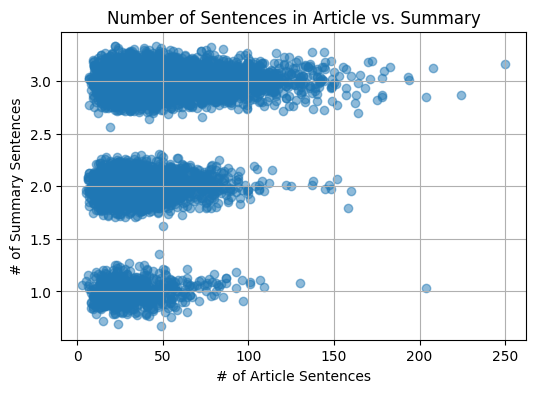

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have a list of articles split into sentences (split_articles)
# and a corresponding list of label decisions (train_highlight_decisions)

# Calculate the number of sentences in each article
num_sentences = [len(article) for article in split_articles]

# Calculate the number of non-zero entries in the labels for each article
num_nonzero_labels = [sum(1 for label in labels if label != 0) for labels in train_highlight_decisions]

# Add random jitter to the y-values
# The scale of the jitter should be chosen according to the scale of the data
# Here, 0.1 is just an example value; you might need to adjust this
jitter = np.random.normal(0, 0.1, size=len(num_nonzero_labels))
num_nonzero_labels_jittered = np.array(num_nonzero_labels) + jitter

# Now we can create a scatter plot with this data
plt.figure(figsize=(6,4))  # Set the size of the figure
plt.scatter(num_sentences, num_nonzero_labels_jittered, alpha=0.5)  # Create a scatter plot with jitter
plt.title('Number of Sentences in Article vs. Summary')  # Set the title of the plot
plt.xlabel('# of Article Sentences')  # Set the label for the x-axis
plt.ylabel('# of Summary Sentences')  # Set the label for the y-axis
plt.grid(True)  # Show grid
plt.show()  # Display the plot

In [39]:
mean_proportion_nonzero * 30


2.342317898267702

In [ ]:
np.mean([len()])

In [1]:
import string
from nltk.corpus import stopwords

# Function to remove punctuation from a sentence
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))


In [2]:
stop_words = set(stopwords.words('english'))

flat_words = [
    word
    for article in split_articles
    for sentence in article
    for word in remove_punctuation(sentence).lower().split()
    if word not in stop_words
]

NameError: name 'split_articles' is not defined

In [3]:
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns

def plot_word_counts(word_list, n):
    word_counts = Counter(word_list)
    most_common_counts = word_counts.most_common(n)
    words = [word for word, count in most_common_counts]
    counts = [count for word, count in most_common_counts]

    plt.figure(figsize=(20, 5))
    sns.barplot(x=words, y=counts, color='lightblue')

    plt.yscale('log')
    plt.ylabel('Count (log scale)')
    plt.xticks([])
    plt.title(f'Top {n} Word Counts')

    # Adding horizontal lines at y=10000, y=1000, and y=100 with different colors and labels for the legend
    line10000 = plt.axhline(y=10000, color='orange', linestyle='--', label='10k')
    line1000 = plt.axhline(y=1000, color='green', linestyle='--', label='1k')
    line100 = plt.axhline(y=100, color='purple', linestyle='--', label='100')

    # Adding a legend to the plot
    plt.legend()

    plt.show()

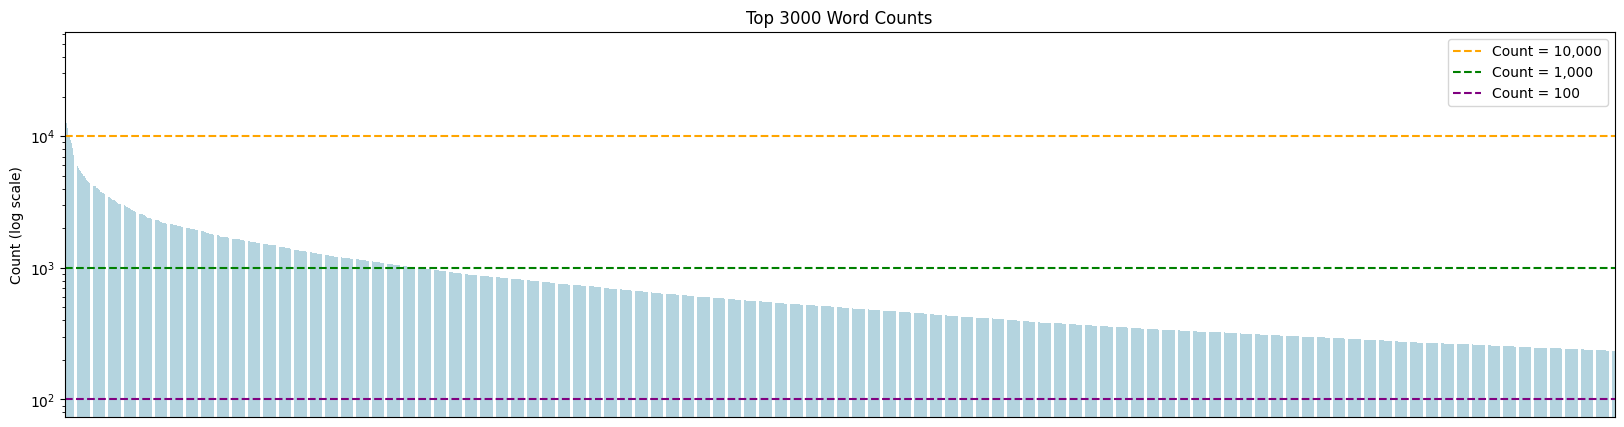

In [101]:
plot_word_counts(flat_words, 3000)

In [108]:
import os
import pickle

pkl_path = f'pickled_scores/embeddings_scores.pkl'

if os.path.exists(pkl_path):
    with open(pkl_path, 'rb') as file:
        sentence_scores = pickle.load(file)

In [116]:
[np.mean(article) for article in sentence_scores]

[0.057238792800019964,
 0.07230719441982962,
 0.08156402204899982,
 0.07807553543870271,
 0.060525311700862346,
 0.05851742065999781,
 0.07439511794267292,
 0.08473604683900815,
 0.15022370671687751,
 0.07715242201117133,
 0.07283666355517304,
 0.08357948164421418,
 0.09504347791206388,
 0.0524673617314183,
 0.13636488449225487,
 0.045105435911613506,
 0.06280521746607859,
 0.042536984278160585,
 0.08455296997612087,
 0.08461979052565906,
 0.07011707186120951,
 0.056948755172664546,
 0.07529235928695398,
 0.09154767218468791,
 0.05675603931510753,
 0.051579152368254964,
 0.06444070541205302,
 0.05214070008624309,
 0.07943458937018298,
 0.07971779992016527,
 0.12572524808711408,
 0.07383140131907578,
 0.07396490266017657,
 0.06948909033427007,
 0.04688195872526374,
 0.05701700575267465,
 0.058490977157824676,
 0.042381414792820725,
 0.08491295444091976,
 0.09078837841864208,
 0.09240013832832127,
 0.06056473205038125,
 0.07018506482666591,
 0.06419279231969714,
 0.04766561615908704,
 0.

In [4]:
import numpy as np
import pickle

with open('pickled_data/embeddings_train.pkl', 'rb') as f:
    embeddings = pickle.load(f)

In [6]:
# Assuming 'article_feature' is a list of vector embeddings

for article_feature in embeddings:
    article_feature = np.array(article_feature)  # Convert to a NumPy array if not already one

    # Normalize each vector to unit length
    norms = np.linalg.norm(article_feature, axis=1, keepdims=True)
    normalized_embeddings = article_feature / norms

    # Compute the cosine similarity matrix
    cosine_similarity_matrix = np.dot(normalized_embeddings, normalized_embeddings.T)


In [7]:
from sentence_transformers import SentenceTransformer
import tqdm

model = SentenceTransformer('paraphrase-MiniLM-L3-v2')

all_sentences = [
    "Hello, how are you?",
    "Today is a good day.",
    "Where are you going today?",
    "How have you been?",
    "The cat ate the orange dolphin.",
    "In algebraic topology, a discipline within mathematics, the acyclic models theorem can be used to show that two homology theories are isomorphic"
]

batch_size = 2048  # make sure batch can fit into python memory
features = []

# Iterate over batches of sentences
for batch_start in tqdm.tqdm(range(0, len(all_sentences), batch_size), desc='Computing Sentence-BERT embeddings'):
    batch_sentences = all_sentences[batch_start:batch_start + batch_size]
    batch_features = model.encode(
        batch_sentences,
        convert_to_tensor=False,
        show_progress_bar=False
    )
    features.extend(batch_features)

/home/timoh/L90-Summarization/summarizer_venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Computing Sentence-BERT embeddings: 100%|██████████| 1/1 [00:02<00:00,  2.86s/it]


In [8]:

article_feature = np.array(features)

norms = np.linalg.norm(article_feature, axis=1, keepdims=True)
normalized_embeddings = article_feature / norms

cosine_similarity_matrix = np.dot(normalized_embeddings, normalized_embeddings.T)

print(cosine_similarity_matrix.T)

[[ 0.9999998   0.26053205  0.4824577   0.49835312 -0.04441106  0.03032698]
 [ 0.26053205  0.9999994   0.5136187   0.08747116 -0.0263608   0.04621622]
 [ 0.4824577   0.5136187   0.9999999   0.38920525 -0.05296707 -0.0246569 ]
 [ 0.49835312  0.08747116  0.38920525  1.0000005  -0.03654645  0.04260694]
 [-0.04441106 -0.0263608  -0.05296707 -0.03654645  0.9999999  -0.09922751]
 [ 0.03032698  0.04621622 -0.0246569   0.04260694 -0.09922751  0.99999994]]


In [9]:
avg_sims = np.sum(cosine_similarity_matrix, axis=1)

In [10]:
avg_sims

array([2.2272587 , 1.8814768 , 2.3076575 , 1.9810905 , 0.74048704,
       0.99526566], dtype=float32)

In [12]:
avg_sims.argsort()

array([4, 5, 1, 3, 0, 2])

In [11]:
avg_sims

array([2.2272587 , 1.8814768 , 2.3076575 , 1.9810905 , 0.74048704,
       0.99526566], dtype=float32)

In [17]:
avg_sims = np.sum(cosine_similarity_matrix, axis=1)
indices = avg_sims.argsort()[::-1][:3]

In [18]:
all_sentences = [all_sentences[i] for i in indices]

In [19]:
all_sentences

['Where are you going today?', 'Hello, how are you?', 'How have you been?']